# Deep Convolutional GANs (DCGANs) by `Mr. Harshit Dawar!`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers as ly
import tensorflow as tf

## Loading the dataset & Visualizing it!

In [97]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [98]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

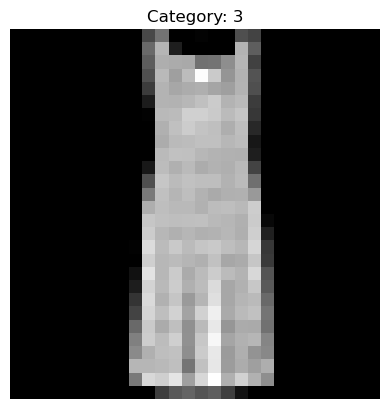

In [99]:
random_image = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[random_image], cmap = "gray")
plt.title("Category: " + str(y_train[random_image]))
plt.axis("off")
plt.show()

In [100]:
# Generating the 3rd Dimenstion for the image as per the requirement of the task
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [101]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
# X_train = tf.convert_to_tensor(X_train, dtype = tf.int64)
# X_test = tf.convert_to_tensor(X_test, dtype = tf.int64)

In [102]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [103]:
# Normalizing the images between -1 to 1
X_train = (X_train - 127.5) / 127.5

In [104]:
X_train.min(), X_train.max()

(-1.0, 1.0)

In [105]:
batch_size = 64
total_images = X_train.shape[0]
total_number_of_batches = total_images / batch_size

In [106]:
total_number_of_batches

937.5

In [107]:
X_train[0].dtype

dtype('float32')

In [108]:
# Changing the type of X_train from numpy array to tensorflow batchdataset
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(total_images).batch(batch_size)

In [109]:
type(X_train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

## Creating the Generator for the GANs